In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

App Ideas:
- Create new fantasy variable that calculates ESPN fantasy points
- Plot/show 10 players with highest average points, rebs, fantasy points, etc (interactable)
- Look up a player, show best games
- Look up a team?
- Compare two players?

Graph Ideas:
- Team wins line chart
- Each team ppg vs league average
- Assist vs turnover scatterplot (plotly?)

In [4]:
# Read in the data scraped above
boxdf = pd.read_csv('boxScores.csv')
boxdf.columns


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS',
       'FANTASY'],
      dtype='object')

In [16]:
# Create a new df that is the sums of stats
# Create a new df that is the averages per game of stats

# Both of these are one row per player.
totals = boxdf.groupby('PLAYER_NAME', as_index = False).sum()
means = boxdf.groupby('PLAYER_NAME').mean()
totals

,PLAYER_NAME,PLAYER_ID,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY
0,A.J. Green,1631260,1610612749,22200033,2,0,0,0.000,0,0,...,0,0,1,0,0,0,0,0,-2,2
1,AJ Griffin,9786600,9663676422,133200551,71,19,32,2.917,7,16,...,5,8,4,5,0,1,5,47,29,94
2,Aaron Gordon,2039320,16106127430,222000772,288,57,101,5.260,8,29,...,39,61,23,6,10,10,12,140,46,298
3,Aaron Holiday,16289880,16106127370,222000767,196,20,43,4.162,7,11,...,7,12,20,8,3,9,13,55,-11,136
4,Aaron Nesmith,9781044,9663676524,133200230,132,19,43,2.747,7,22,...,18,21,9,1,5,6,18,52,7,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Yuta Watanabe,16291390,16106127510,222000876,160,22,37,5.084,12,22,...,19,24,5,3,6,3,10,56,12,137
445,Zach Collins,14655420,14495514831,199800578,158,31,59,4.830,7,18,...,30,42,25,6,11,17,27,75,-17,208
446,Zach LaVine,1631176,12884901928,177600713,267,59,134,3.483,26,60,...,27,30,33,10,1,18,18,175,6,283
447,Zeke Nnaji,9781152,9663676458,133200359,24,5,10,1.667,0,2,...,2,5,0,1,0,1,8,12,-23,19


In [5]:
means['MIN'].mean()

19.090171440783898

Text(0.5, 0, 'Total Turnovers')

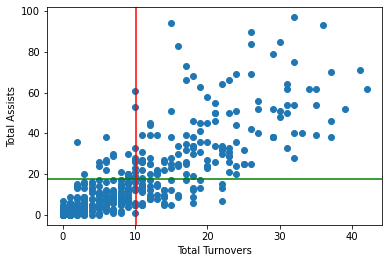

In [6]:
# Scatterplot for assists vs. turnovers
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(totals['TOV'], totals['AST'])
plt.axhline(y = totals['AST'].mean(), color = 'g', label = 'Average Total Turnovers')
plt.axvline(x = totals['TOV'].mean(), color = 'r')
plt.ylabel('Total Assists')
plt.xlabel('Total Turnovers')

# Need to put in a minutes minimum
# For the app:choose which team to filter by

In [17]:
fig = px.scatter(totals, x = 'TOV', y ='AST',
    title = 'Total Assists vs. Total Turnovers',
    hover_data = ['PLAYER_NAME'])
fig.show()

Text(0, 0.5, 'Average points scored')

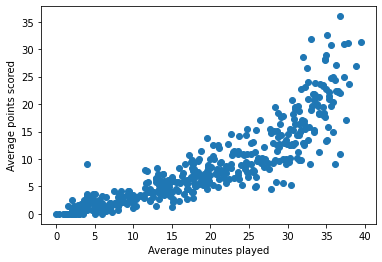

In [10]:
# Scatterplot for points vs. mins (maybe with a minimum minutes threshold)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot()
ax.scatter(means['MIN'], means['PTS'])
plt.xlabel('Average minutes played')
plt.ylabel('Average points scored')


Things to make dynamic here:
- Category (can be pooints, rebounds, assists, fantasy points, etc)
- updating category should also update the average bar
- top n players (from like 3 to 25) With a selection bar?
- Counts vs average? or both?

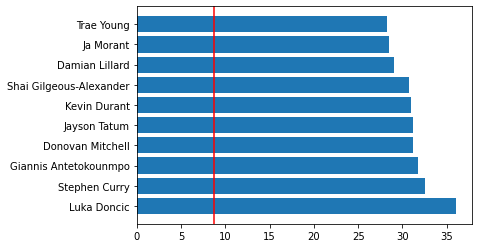

In [29]:
# Top 15 most points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot()
# Get a list of top 15 average points, and the average points
points = means['PTS'].sort_values(ascending = False).head(10)
ax.barh(points.index, points)
plt.axvline(means['PTS'].mean(), color = 'r')

Search for a player and compare their stats
- show average mins/game
- show average fantasy points/game
- show their location in boxplot distributions


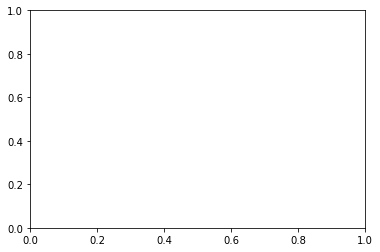

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# Top 15 most rebounds average (with league average included)

# Top 15 counts rebounds (with weighted league average included)

In [ ]:
# Fantasy leaders with stacked barcharts that include pts, rebs, asts, etc